In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c')
c_qftadder = QuantumCircuit(q, c)

#Test
c_qftadder.x(q[2])
#c_qftadder.x(q[1])
#c_qftadder.x(q[0])


#QFT
# c_qftadder.h(q[3])
# c_qftadder.cp(np.pi / 2, q[4], q[3])
# c_qftadder.cp(np.pi / 4, q[5], q[3])
# c_qftadder.h(q[4])
# c_qftadder.cp(np.pi / 2, q[5], q[4])
# c_qftadder.h(q[5])
# c_qftadder.swap(q[3],q[5])

# c_qftadder.h(q[3])
# c_qftadder.cp(np.pi / 2, q[4], q[3])
# c_qftadder.h(q[4])
# c_qftadder.cp(np.pi / 4, q[5], q[3])
# c_qftadder.cp(np.pi / 2, q[5], q[4])
# c_qftadder.h(q[5])
#c_qftadder.swap(q[3],q[5])
c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

# c_qftadder.x(q[3])
# c_qftadder.x(q[5])
c_qftadder.h(q[5])
c_qftadder.cp(np.pi/4,q[3],q[5])
c_qftadder.cp(np.pi/2,q[4],q[5])
c_qftadder.h(q[4])
c_qftadder.cp(np.pi/2,q[3],q[4])
c_qftadder.h(q[3])
c_qftadder.swap(q[3], q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

# #CZ

# c_qftadder.cp(np.pi, q[0], q[5])
# c_qftadder.cp(np.pi / 2, q[1], q[5])
# c_qftadder.cp(np.pi / 4, q[2], q[5])
# c_qftadder.cp(np.pi, q[1], q[4])
# c_qftadder.cp(np.pi / 2, q[2], q[4])
# c_qftadder.cp(np.pi, q[2], q[3])

c_qftadder.cp(np.pi, q[0], q[3])
c_qftadder.cp(np.pi / 2, q[1], q[3])
c_qftadder.cp(np.pi / 4, q[2], q[3])
c_qftadder.cp(np.pi, q[1], q[4])
c_qftadder.cp(np.pi / 2, q[2], q[4])
c_qftadder.cp(np.pi, q[2], q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

# # # c_qftadder.swap(q[3],q[5])
# # # c_qftadder.h(q[5])
# # # c_qftadder.cp(np.pi / 2, q[5], q[4])
# # # c_qftadder.h(q[4])
# # # c_qftadder.cp(np.pi / 4, q[5], q[3])
# # # c_qftadder.cp(np.pi / 2, q[4], q[3])
# # # c_qftadder.h(q[3])
# c_qftadder.swap(q[3],q[5])
# c_qftadder.h(q[5])
# c_qftadder.cp(np.pi / 2, q[4], q[5])
# c_qftadder.h(q[4])
# c_qftadder.cp(np.pi / 4, q[3], q[5])
# c_qftadder.cp(np.pi / 2, q[3], q[4])
# c_qftadder.h(q[3])

# c_qftadder.u2(0, np.pi, q[3])
# c_qftadder.u2(0, np.pi, q[4])
# c_qftadder.u2(0, np.pi, q[5])
# c_qftadder.u(0, 0, 5/4*np.pi ,q[3])
# c_qftadder.u(0, 0, 5/2*np.pi ,q[4])
# c_qftadder.u(0, 0, 5*np.pi, q[5])
c_qftadder.swap(q[3], q[5])
c_qftadder.h([3])
c_qftadder.cp(-np.pi/2, q[3], q[4])
c_qftadder.h(q[4])
c_qftadder.cp(-np.pi/2, q[4], q[5])
c_qftadder.cp(-np.pi/4, q[3], q[5])
c_qftadder.h(q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])
c_qftadder.measure(q[3], c[0])
c_qftadder.measure(q[4], c[1])
c_qftadder.measure(q[5], c[2])

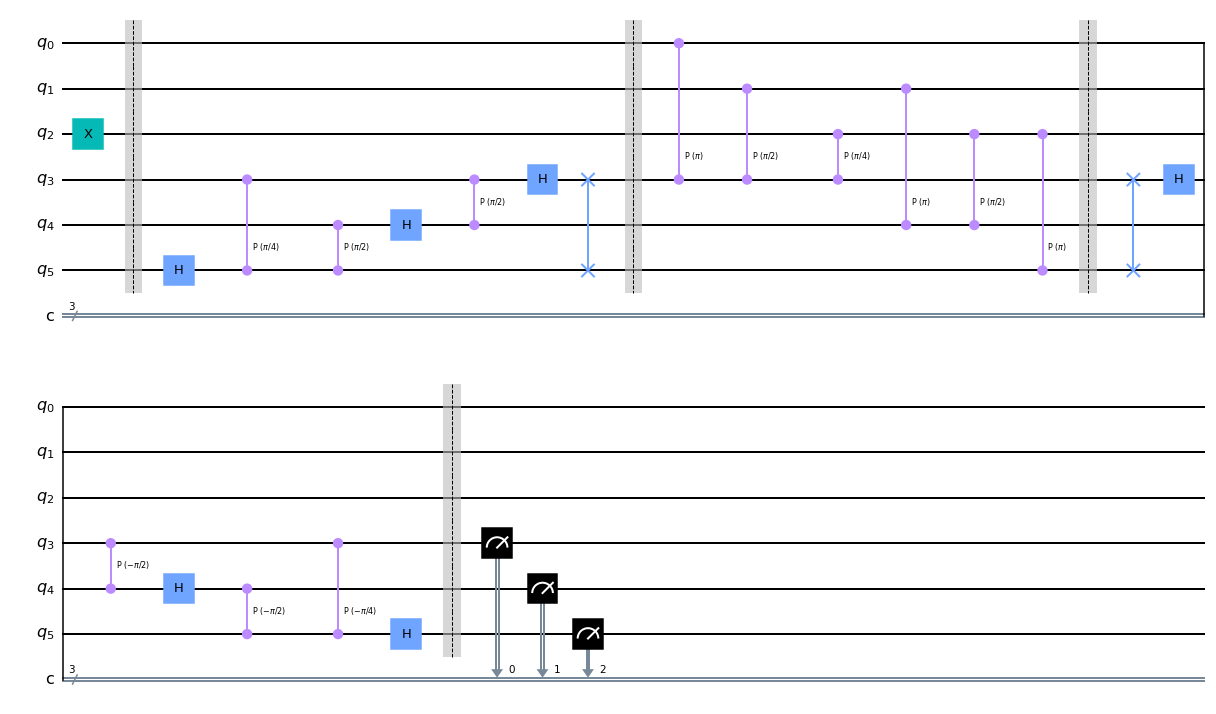

In [3]:
%matplotlib inline
c_qftadder.draw(output='mpl')

In [4]:
provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-graduate')
#backend = provider.get_backend('ibmq_jakarta')
backend = provider.get_backend('ibm_perth')

In [ ]:
#job = execute(c_qftadder, backend, shots=100000)
job = execute(c_qftadder, backend)
result = job.result()
#counts = result.get_counts(c_qftadder)
counts = result.get_counts(c_qftadder)
print("\nTotal count for 00 and 11 are:",counts)
#_qftadder.draw()
c_qftadder.draw()